In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:

df= pd.read_csv('hyundai.xls')
print(df)

        model  year  price transmission  mileage fuelType  tax   mpg  \
0         I20  2017   7999       Manual    17307   Petrol  145  58.9   
1      Tucson  2016  14499    Automatic    25233   Diesel  235  43.5   
2      Tucson  2016  11399       Manual    37877   Diesel   30  61.7   
3         I10  2016   6499       Manual    23789   Petrol   20  60.1   
4        IX35  2015  10199       Manual    33177   Diesel  160  51.4   
...       ...   ...    ...          ...      ...      ...  ...   ...   
4855      I30  2016   8680       Manual    25906   Diesel    0  78.4   
4856      I40  2015   7830       Manual    59508   Diesel   30  65.7   
4857      I10  2017   6830       Manual    13810   Petrol   20  60.1   
4858   Tucson  2018  13994       Manual    23313   Petrol  145  44.8   
4859   Tucson  2016  15999    Automatic    11472   Diesel  125  57.6   

      engineSize  
0            1.2  
1            2.0  
2            1.7  
3            1.0  
4            2.0  
...          ...  
48

In [21]:
#Deskripsi data set untuk melihat beberapa detail dri dataset
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [22]:
#melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax           4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


<Axes: >

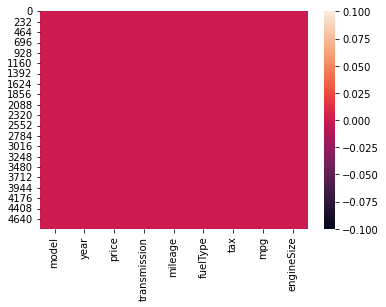

In [23]:
#hitmap dri data set apa ada null apa kga
sns.heatmap(df.isnull())

In [24]:
# deskripsi
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


#Visualisasi Data

C:\Users\anisa\AppData\Local\Temp\ipykernel_29788\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

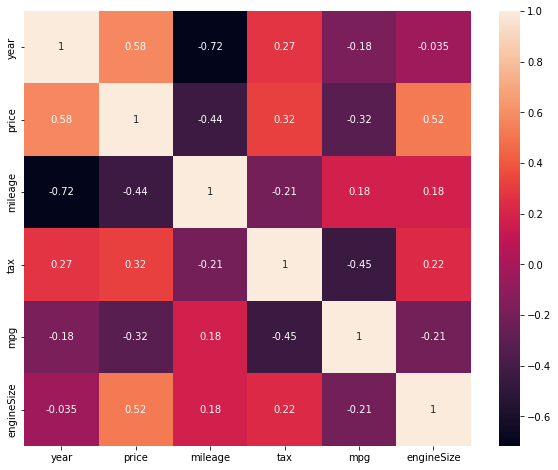

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#Jumlah Mobil Bekas Berdasarkan Model

In [27]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Accent'),
  Text(1, 0, ' Amica'),
  Text(2, 0, ' Terracan'),
  Text(3, 0, ' Veloster'),
  Text(4, 0, ' Getz'),
  Text(5, 0, ' I800'),
  Text(6, 0, ' IX35'),
  Text(7, 0, ' I40'),
  Text(8, 0, ' IX20'),
  Text(9, 0, ' Santa Fe'),
  Text(10, 0, ' Ioniq'),
  Text(11, 0, ' Kona'),
  Text(12, 0, ' I20'),
  Text(13, 0, ' I30'),
  Text(14, 0, ' I10'),
  Text(15, 0, ' Tucson')])

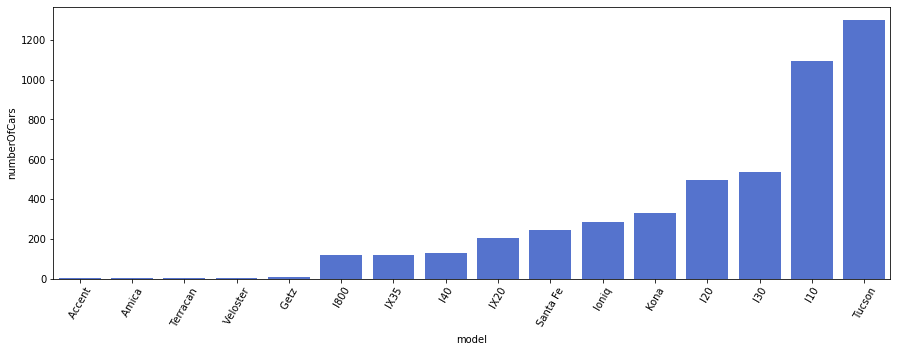

In [30]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

Ukuran mesin

In [33]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax' : 'count'})

<Axes: xlabel='engineSize', ylabel='count'>

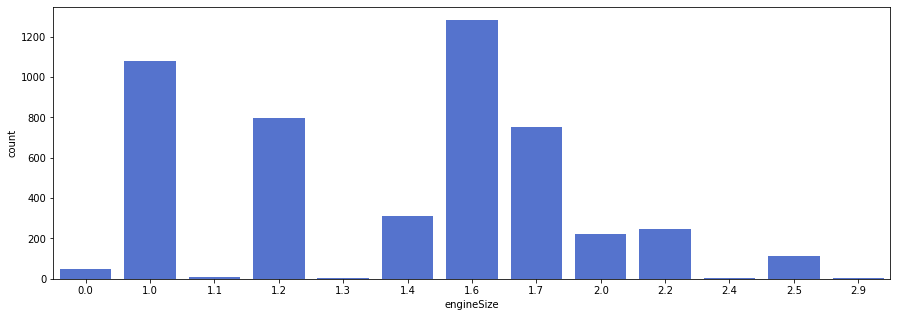

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'],color='royalblue')

Membuat nilai distribusi mileage(seberapa jauh mobil ini jalan kilometer)
Distribusi Mileage

C:\Users\anisa\AppData\Local\Temp\ipykernel_29788\148899218.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

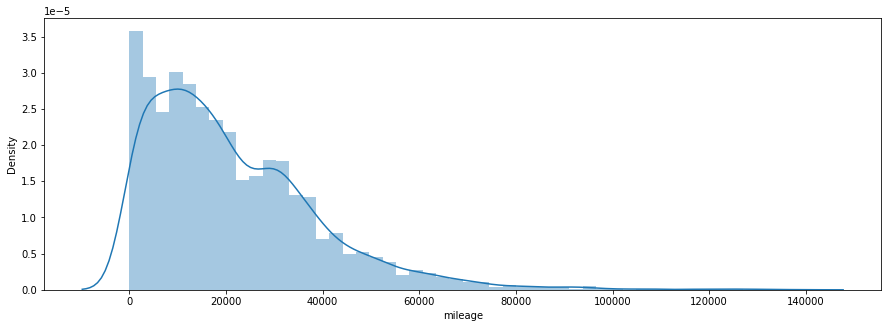

In [35]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

Nilai Distribusi harga mobil bekas
Distribusi Harga Mobil

C:\Users\anisa\AppData\Local\Temp\ipykernel_29788\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

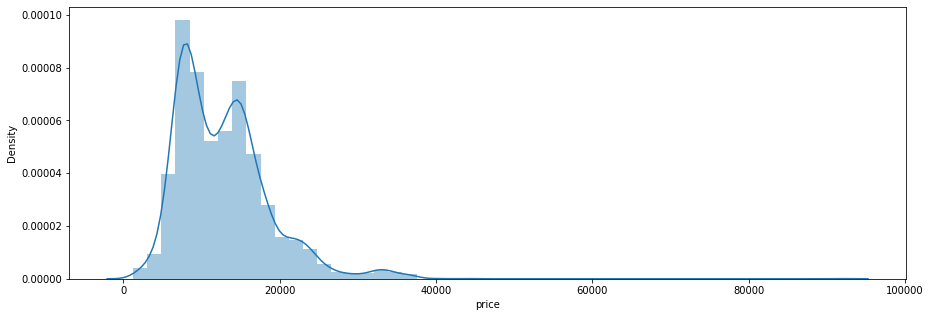

In [36]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

#Seleksi Fiture

In [37]:
features =['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape
#shpe = mengetahui jumplah kolom dan baris

((4860, 5), (4860,))

Split data training dan data testing

In [40]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test= train_test_split(x,y,random_state=70)
y_test.shape

(1215,)

Membuat Model Regresi Linier

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred =lr.predict(X_test)

In [45]:
score = lr.score(X_test,y_test)
print('Akurasi Model Regresi Linear =',score)

Akurasi Model Regresi Linear = 0.6943788238567711


Membuat inputan model regresi linear (sesuai data fitur)

In [46]:
#terdiri dri year=2019, mileage=5000,tax=145,mpg=30.2,engineSize=2
input_data = np.array([[2019,5000,145,30.2,2]])

prediction = lr.predict(input_data)
print('estimasi harga mobil bekas dalam EUR /pons :',prediction)

estimasi harga mobil bekas dalam EUR /pons : [22129.21067305]


C:\Users\anisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


save Model

In [47]:
import pickle
filename='estimasi_harga_mobil.sav'
pickle.dump(lr,open(filename,'wb'))